In [ ]:
#imports 
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #looks for GPU to train on

tf = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(), 
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5]) 
]) 

#Loading the training set and and preprocessing the data
train_dl = DataLoader(
    datasets.ImageFolder(r"C:\Users\ire0349s\Documents\GitHub\Brain-Tumor-Detector\Dataset\Training", tf),
    batch_size=32, shuffle=True, num_workers=4, pin_memory=True
) 

#Loading the test set
test_dl = DataLoader(
    datasets.ImageFolder(r"C:\Users\ire0349s\Documents\GitHub\Brain-Tumor-Detector\Dataset\Testing", tf),
    batch_size=32, shuffle=False, num_workers=4, pin_memory=True
) 

In [ ]:
#Defining the CNN architecture 
model = nn.Sequential(
    nn.Conv2d(3, 32, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(32, 64, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Conv2d(64, 128, 3, 1, 1), nn.ReLU(), nn.MaxPool2d(2),
    nn.Flatten(),
    nn.Linear(128 * 16 * 16, 256), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(256, 4)
).to(device)

In [ ]:
#Defines the optimizer and the loss function
opt = optim.Adam(model.parameters(), 1e-4)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
#Trainig the model
model.train()

for epoch in range(25):
    running_loss = 0

    for x, y in train_dl:
        opt.zero_grad()

        loss = loss_fn(model(x.to(device)), y.to(device))
        loss.backward()

        running_loss += loss

        opt.step()

    print(f'Epoch {epoch + 1}: Loss was {running_loss}')

Epoch 1: Loss was 150.1702423095703
Epoch 2: Loss was 97.38890838623047
Epoch 3: Loss was 80.32908630371094
Epoch 4: Loss was 71.1517105102539
Epoch 5: Loss was 61.99036407470703
Epoch 6: Loss was 55.2152214050293
Epoch 7: Loss was 49.00248336791992
Epoch 8: Loss was 43.188541412353516
Epoch 9: Loss was 37.693763732910156
Epoch 10: Loss was 34.9570426940918
Epoch 11: Loss was 29.730363845825195
Epoch 12: Loss was 26.858379364013672
Epoch 13: Loss was 25.236007690429688
Epoch 14: Loss was 22.11751365661621
Epoch 15: Loss was 18.852876663208008
Epoch 16: Loss was 17.177936553955078
Epoch 17: Loss was 15.663745880126953
Epoch 18: Loss was 15.218657493591309
Epoch 19: Loss was 13.078994750976562
Epoch 20: Loss was 11.514067649841309
Epoch 21: Loss was 10.159239768981934
Epoch 22: Loss was 11.23557186126709
Epoch 23: Loss was 8.392460823059082
Epoch 24: Loss was 7.112480640411377
Epoch 25: Loss was 7.6636505126953125


In [ ]:
#Evaluating how the model is doing
model.eval()
test_loss, correct = 0.0, 0
with torch.no_grad():
    for x, y in test_dl:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        test_loss += loss_fn(logits, y).item() * y.size(0)

        preds = logits.argmax(1)
        correct += (preds == y).sum().item()

test_loss /= len(test_dl.dataset)
accuracy = 100 * correct / len(test_dl.dataset)

print(f'Test Loss: {test_loss}, Accuracy: {accuracy}%')

Test Loss: 0.12499692025113124, Accuracy: 96.72006102212052%


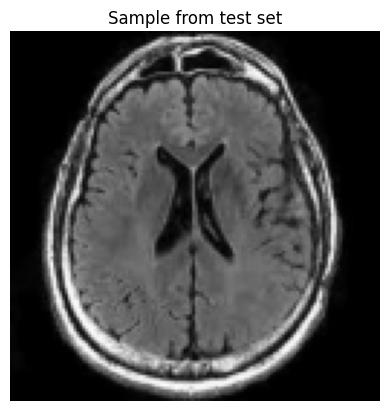

Predicted: notumor, Actual: notumor


In [11]:
#Plotting random images and the predicted and actual resoults
import random

import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

model.eval()

idx = random.randrange(len(test_dl.dataset))
img, label = test_dl.dataset[idx]

unnorm = img * 0.5 + 0.5
plt.imshow(to_pil_image(unnorm))
plt.axis('off')
plt.title('Sample from test set')
plt.show()

with torch.no_grad():
    logits = model(img.unsqueeze(0).to(device))
    pred = logits.argmax(1).item()

class_names = test_dl.dataset.classes
print(f'Predicted: {class_names[pred]}, Actual: {class_names[label]}')